# Storage/Power FLM Revenue Performance Analysis

### Objectives

Project Scope: Provide summary analysis of current Power and Storage FLMs/sellers relative to opportunity workload and win rate yield. Profile seller job role categories and current territory sizing of account assignment.

Project Deliverables: Detail opportunity and account workload profiles for all Power and Storage direct channel sellers. These deliverables will provide through Excel workbooks and overview slides. All modeling documentation will be provided to Systems Sales teams in each Geo.

Gross Estimate Benefit: Project will enable Geo sales leaders to improve Power and Storage seller workloads of quota-plan sellers by 1% for 2021 by increasing focus on high priority territory accounts.


In [135]:
#Importing libraries

import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
sns.set()

### Importing data set 

In [136]:
flm_data = pd.read_excel ('C:/Users/SuprasannaPradhan/Documents/DIA/Trell_Proejct_data/Technology_xray.xlsx',header=1)

In [137]:
flm_data.head(3)

,Unnamed: 0,Geo,Market,Country,Business Unit,Org Name,Mgr Cnum,Mgr Notes Id,Mgr Role Description,# of clients (ToT),Dedication \n(Hist$ based),# of F2F Sellers,# of Ecosystem Sellers,# of Digital Sellers,# of Technical \nSellers,Total Sellers
0,NaN,Americas,Canada,Canada,Cloud And Cognitive Software,Security Services,066652649,Aphra Corcoran/Markham/IBM@IBM,Security Services Sales Manager (FLM) IQP S1 a...,29585,55% S1 / 45% S2,4,0,0,0,4
1,NaN,Americas,Canada,Canada,Cloud And Cognitive Software,Security Services,0D6521649,Sanju Cherian/Markham/IBM@IBM,Security Services PE Standard S1 and S2,29585,55% S1 / 45% S2,2,0,0,0,2
2,NaN,Americas,Canada,CANADA,Cloud And Cognitive Software,AI Applications Portfolio,007992649,Gregory Schiltroth/Toronto/IBM@IBM,AIA AI Applications Portfolio FLM IQP S1 and S2,7502,0% S1 / 100% S2,9,1,0,0,10


### Checking information of data set

In [138]:
# Check data
flm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 0 non-null      float64
 1   Geo                        432 non-null    object 
 2   Market                     432 non-null    object 
 3   Country                    432 non-null    object 
 4   Business Unit              432 non-null    object 
 5   Org Name                   432 non-null    object 
 6   Mgr Cnum                   432 non-null    object 
 7   Mgr Notes Id               432 non-null    object 
 8   Mgr Role Description       432 non-null    object 
 9   # of clients (ToT)         432 non-null    int64  
 10  Dedication 
(Hist$ based)  432 non-null    object 
 11  # of F2F Sellers           432 non-null    int64  
 12  # of Ecosystem Sellers     432 non-null    int64  
 13  # of Digital Sellers       432 non-null    int64  

    This data set is having 432 recors and 15 columns: total F2F Sellers , Ecosystem Sellers Digital Seller ,Technical sellers and Total sellers are numberic, all  other columns are catogorical data . Total Sellers is sum of all four columns 
    To analyse the firstline Mangers behaviour we can use all variable inspite of Manger Cnum .
    Data set does not consistent any time periodic parameter

####  Checking missing values

In [139]:
# Looking for NaN
display(flm_data.isnull().any())

Unnamed: 0                     True
Geo                           False
Market                        False
Country                       False
Business Unit                 False
Org Name                      False
Mgr Cnum                      False
Mgr Notes Id                  False
Mgr Role Description          False
# of clients (ToT)            False
Dedication \n(Hist$ based)    False
# of F2F Sellers              False
# of Ecosystem Sellers        False
# of Digital Sellers          False
# of Technical \nSellers      False
Total Sellers                 False
dtype: bool

    There are no missing value and the data set is clean so we will continue with data visualization.

### Rearrangeing column Names 

In [140]:
flm_data = flm_data.rename(columns={'# of clients (ToT)': 'Client_Tot', 
                        'Dedication \n(Hist$ based)': 'Dedication','# of F2F Sellers':'F2F_Sellers','# of Ecosystem Sellers':'Ecosystem_Sellers',	'# of Digital Sellers':'Digital_Sellers','# of Technical \nSellers':'Technical_Sellers','Total Sellers':'Total_Sellers','Business Unit':'Business_Unit','Mgr Role Description':'Mgr_Role','Mgr Notes Id':'Mgr_Id','Mgr Cnum':'Mgr_Cnum','Org Name':'Org_Name'})


    We have changed the column names here to process our analysis 

In [141]:
#Checking Number of Columns
flm_data.columns

Index(['Unnamed: 0', 'Geo', 'Market', 'Country', 'Business_Unit', 'Org_Name',
       'Mgr_Cnum', 'Mgr_Id', 'Mgr_Role', 'Client_Tot', 'Dedication',
       'F2F_Sellers', 'Ecosystem_Sellers', 'Digital_Sellers',
       'Technical_Sellers', 'Total_Sellers'],
      dtype='object')

    Changed columns here , found unnamed :0 not required for our analysis purpose 

In [142]:
# Removing  the Unnamed:column from the data
flm_data=flm_data.iloc[:, 1:]

In [143]:
flm_data.head(2)

,Geo,Market,Country,Business_Unit,Org_Name,Mgr_Cnum,Mgr_Id,Mgr_Role,Client_Tot,Dedication,F2F_Sellers,Ecosystem_Sellers,Digital_Sellers,Technical_Sellers,Total_Sellers
0,Americas,Canada,Canada,Cloud And Cognitive Software,Security Services,066652649,Aphra Corcoran/Markham/IBM@IBM,Security Services Sales Manager (FLM) IQP S1 a...,29585,55% S1 / 45% S2,4,0,0,0,4
1,Americas,Canada,Canada,Cloud And Cognitive Software,Security Services,0D6521649,Sanju Cherian/Markham/IBM@IBM,Security Services PE Standard S1 and S2,29585,55% S1 / 45% S2,2,0,0,0,2


### Exploratory data analysis

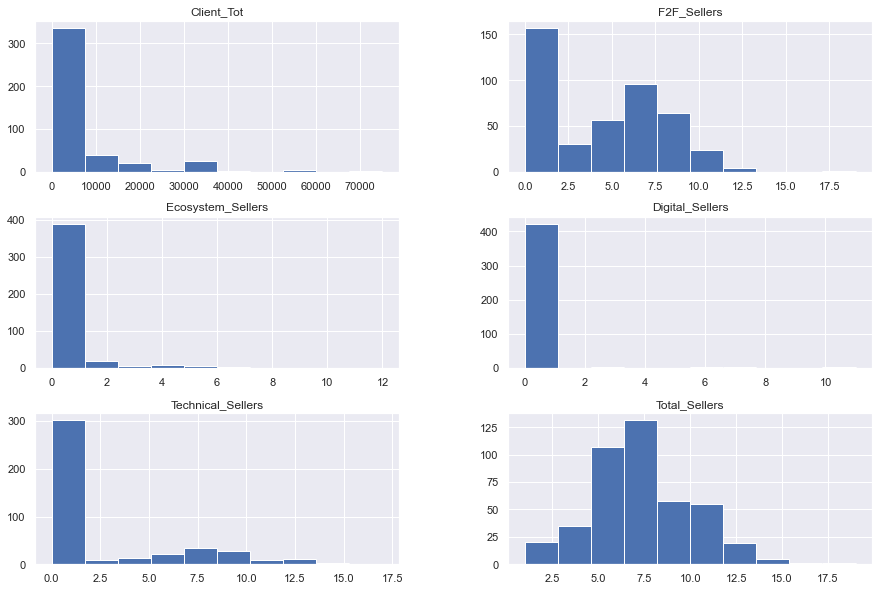

In [144]:
#Visualization
flm_data.hist(figsize=(15,10))
plt.show()

    In this univariate histograms shows us the distributions of numberic frequencies of column Total client , F2F sellers ,Ecosystem sellers, Digital sellers, Technical sellers and  and Totalsellers 
    
    1)In Total clinet data maximum clients lies down in less than 10000 category of frequency there is a few clients are there exceeding after 10000 
    
    2)F2F sellers found clearly it is lies between 1 to 2 as maximum number of frequency.
    
    3)Ecosystem sellers and Digital sellers are clearly lied with 1 
    
    4)Technical sellers limited with maximum in frequency vlaue of 1. 
    
    5)Total sellers is accumulation of all these three sales qauntitiy, hence we have to analyise this other vaiables    


In [145]:
# Sorting values for total client with Geo and Country and Market
geo_client = flm_data.groupby(['Geo']).sum()['Client_Tot'].reset_index()
country_client = flm_data.groupby(['Country']).sum()['Client_Tot'].reset_index()
mkt_client = flm_data.groupby(['Market']).sum()['Client_Tot'].reset_index()

In [146]:
# Getting sorted vlaues 
geo_client= geo_client.sort_values('Client_Tot',ascending=False) 
country_client= country_client.sort_values('Client_Tot',ascending=False) 
mkt_client= mkt_client.sort_values('Client_Tot',ascending=False) 

In [147]:
# Display all data frame in one line 
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [148]:
#Geo_client.head(),Country_client.head()
display_side_by_side(geo_client,country_client,mkt_client, titles=['Geo wise total clients','Country wise total clients','Market wise total clients'])

,Geo,Client_Tot
1,Americas,930617
0,APAC,657504
2,EMEA,616947
3,Japan,562453
,Country,Client_Tot
18,Japan,562453
35,UNITED STATES,467581
11,Germany,290832
9,China,203202
38,United States,165531


    1) Observed that in Geo Americas is occured the maximum clients of 930617 ,wheras Japan is limited with maximum clients of 562453
    2) Country wise Japan is haivng maximum clinets and Israel 10 clients only .
    3) By Market again Japan is holding maximu clients and Middle East and Afirca is at least cleints.

In [149]:
geo_cl = flm_data.groupby("Geo")["Client_Tot"].sum()
geo_cl

Geo
APAC        657504
Americas    930617
EMEA        616947
Japan       562453
Name: Client_Tot, dtype: int64

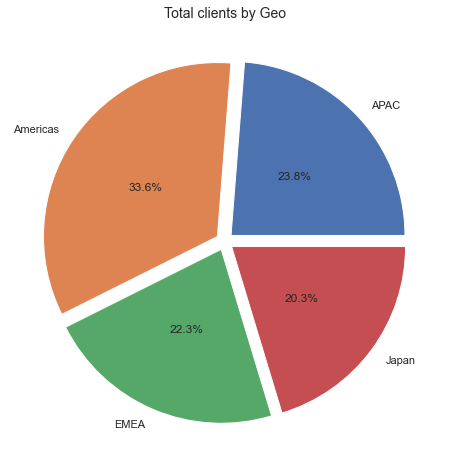

In [150]:
# data.plot.pie(autopct="%.1f%%");
# Using matplotlib
pie, ax = plt.subplots(figsize=[15,8])
labels = geo_cl.keys()
plt.pie(x=geo_cl, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Total clients by Geo", fontsize=14);
pie.savefig("ClientsGeoPieChart.png")

    Geo Americas has more clients compare to other Geo locaitons


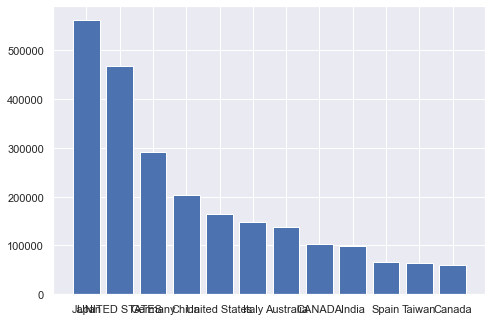

In [151]:
# Plot clinets by country
import matplotlib.pyplot as plt
fig = plt.figure(20)
plt.rcParams["figure.figsize"] = (15,5)
ax = fig.add_axes([0,0,1,1])
country = country_client['Country'].head(12)
client = country_client['Client_Tot'].head(12)
ax.bar(country,client)
plt.show()

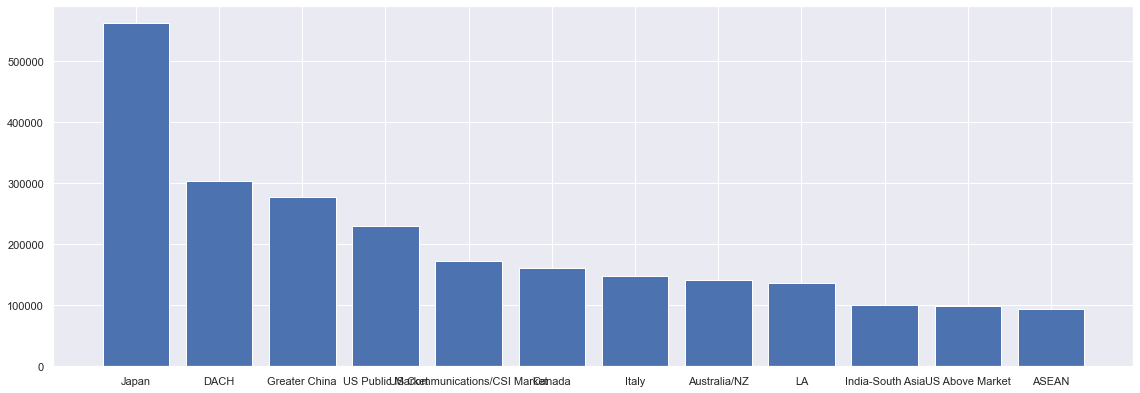

In [152]:
# Plot Clients by Market
import matplotlib.pyplot as plt
fig = plt.figure(20)
plt.rcParams["figure.figsize"] = (20,5)
ax = fig.add_axes([0,0,1,1])
mkt = mkt_client['Market'].head(12)
client = mkt_client['Client_Tot'].head(12)
ax.bar(mkt,client)
plt.show()

In [153]:
#Checking Total sellers Geo Vs county and market 
geo_sellers = flm_data.groupby('Geo').sum()['Total_Sellers'].reset_index()
country_sellers = flm_data.groupby(['Country']).sum()['Total_Sellers'].reset_index()
mkt_sellers = flm_data.groupby(['Market']).sum()['Total_Sellers'].reset_index()

geo_sellers= geo_sellers.sort_values('Total_Sellers',ascending=False) 
country_sellers= country_sellers.sort_values('Total_Sellers',ascending=False) 
mkt_sellers= mkt_sellers.sort_values('Total_Sellers',ascending=False) 

In [154]:
display_side_by_side(geo_sellers,country_sellers,mkt_sellers, titles=['Total sellers by Geo ','Top total sellers by Country','Top total sellers by Market '])

,Geo,Total_Sellers
1,Americas,2045
0,APAC,543
2,EMEA,367
3,Japan,215
,Country,Total_Sellers
35,UNITED STATES,1561
18,Japan,215
11,Germany,181
5,CANADA,166
3,BRAZIL,130


    1) Geo wise total sellers Amercias is shown maximum and Japan is minmum
    2) UNITED STATE is holding maximmum sellers of 1561 and Sri Lanka has number of sellers is one.
    3) US Public Market is occured 399 sellers and Middle East & Africa is ended up with 9 sellers in espect to market

In [155]:
geo_sal = flm_data.groupby("Geo")["Total_Sellers"].sum()
geo_sal

Geo
APAC         543
Americas    2045
EMEA         367
Japan        215
Name: Total_Sellers, dtype: int64

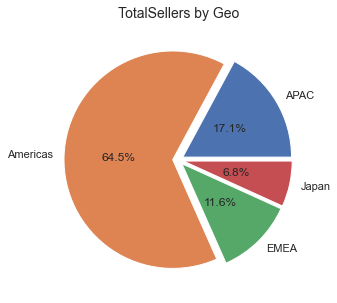

In [215]:
#Percentage pie of Geo by Total sellers 
# data.plot.pie(autopct="%.1f%%");
# Using matplotlib
pie, ax = plt.subplots(figsize=[12,5])
labels = geo_sal.keys()
plt.pie(x=geo_sal, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("TotalSellers by Geo", fontsize=14);
pie.savefig("SellerscoutryPieChart.png")

    Observed that 64.5% of total sellers is covered by Geo America 

Text(0, 0.5, 'Frequency of Total sale')

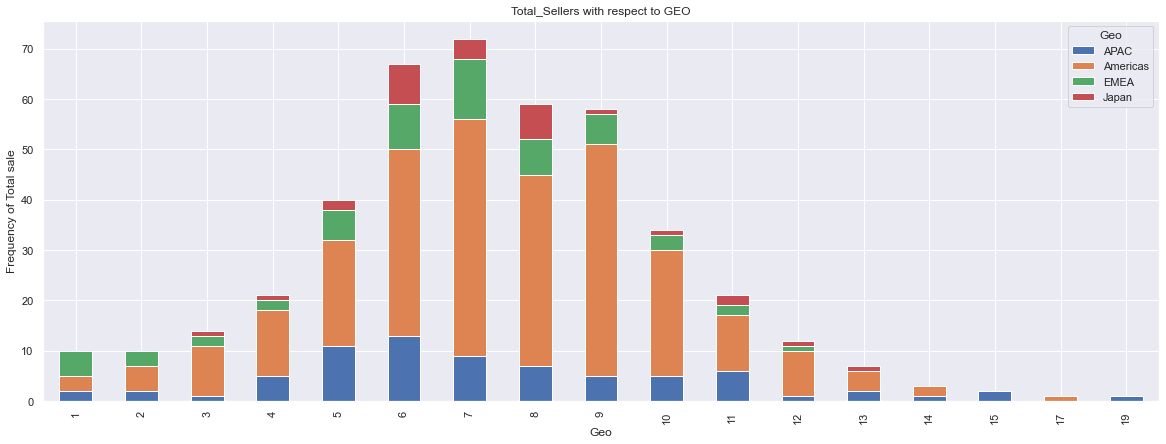

In [157]:
# plt.figure(figsize=(20,5))
plt.rcParams["figure.figsize"] = (20,7)
pd.crosstab(flm_data['Total_Sellers'],flm_data['Geo']).plot(kind='bar',stacked=True)
plt.title('Total_Sellers with respect to GEO')
plt.xlabel('Geo')
plt.ylabel('Frequency of Total sale')

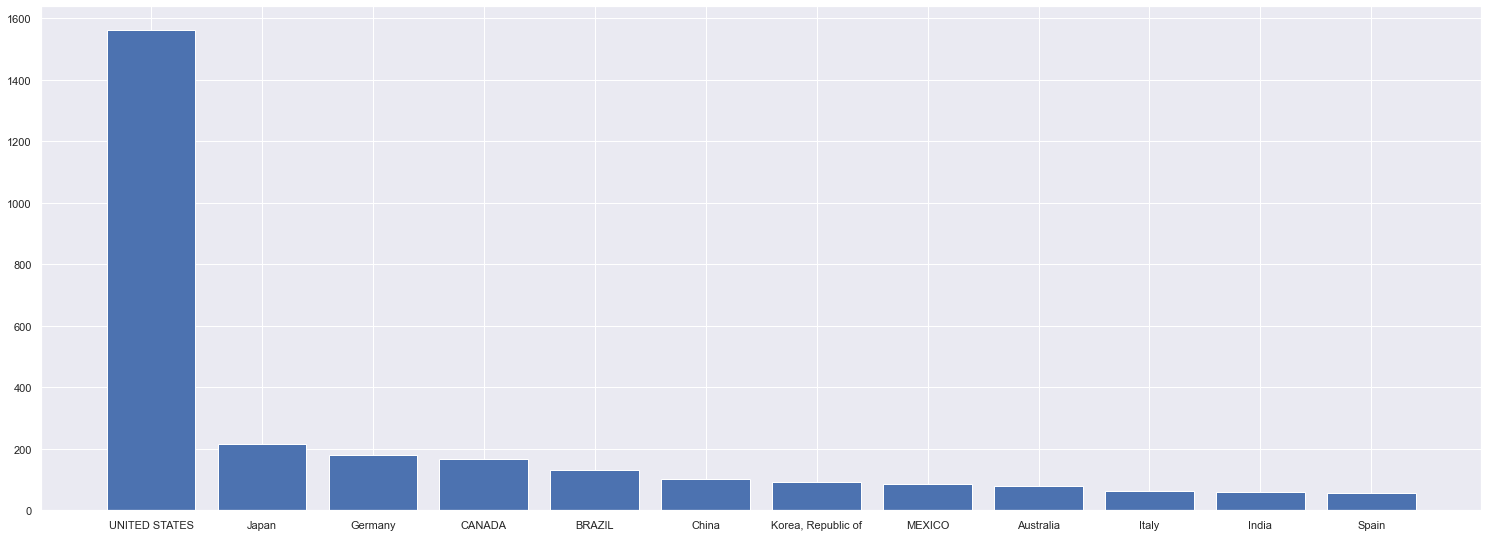

In [158]:
import matplotlib.pyplot as plt
fig = plt.figure(20)
plt.rcParams["figure.figsize"] = (20,5)
ax = fig.add_axes([0,0,1,1])
country = country_sellers['Country'].head(12)
sellers = country_sellers['Total_Sellers'].head(12)
ax.bar(country,sellers)
plt.show()

### Finding  trends market wise

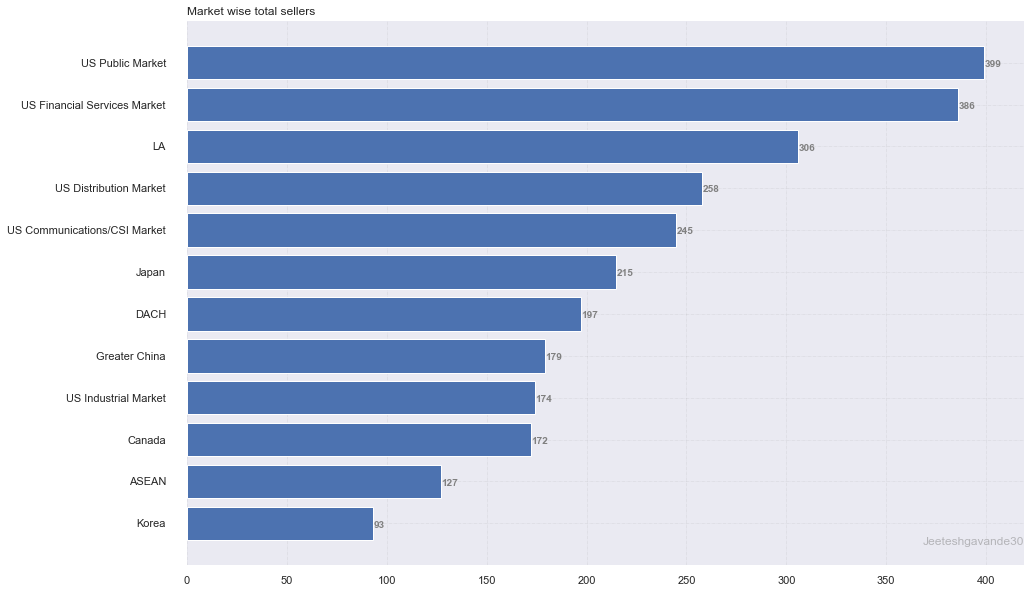

In [159]:
market = mkt_sellers['Market'].head(12)
seller = mkt_sellers['Total_Sellers'].head(12)
# Figure Size
fig, ax = plt.subplots(figsize =(15, 10)) 
# Horizontal Bar Plot
ax.barh(market, seller)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 15)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Market wise total sellers',
             loc ='left', )
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.5)
# Show Plot
plt.show()

    US Public Market is providing highest sellers wheras Middle East & Africa able performed only for atleast sellers

### Business Unit wise total sellers 

In [160]:
# Business Unit wise total sellers 
bu_unit = flm_data.groupby('Business_Unit').sum()['Total_Sellers'].reset_index()
bu_unit = bu_unit.sort_values('Total_Sellers',ascending=True) 
bu_unit

,Business_Unit,Total_Sellers
1,Cloud Platform,122
2,Systems HW,951
0,Cloud And Cognitive Software,2097


Text(0, 0.5, 'Frequency of Total sale')

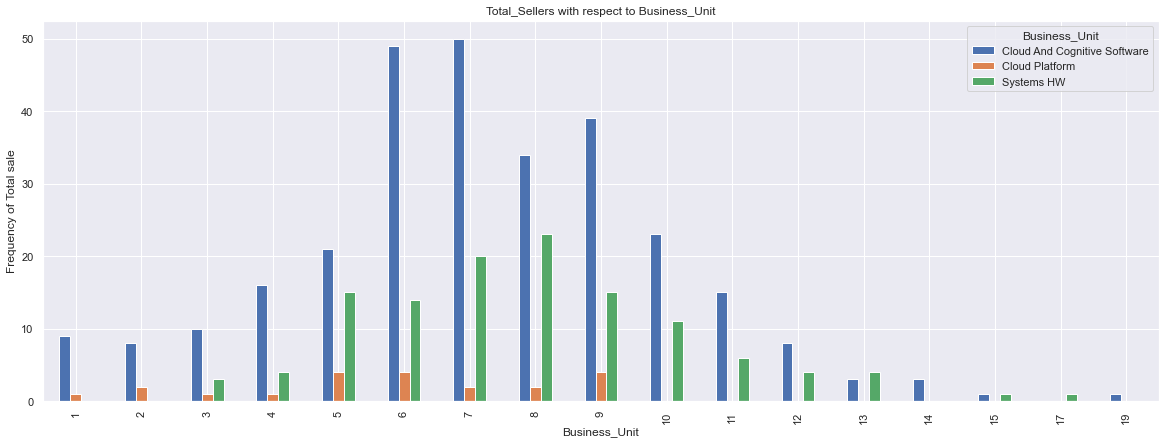

In [161]:
# plt.figure(figsize=(20,5))
plt.rcParams["figure.figsize"] = (20,7)
pd.crosstab(flm_data['Total_Sellers'],flm_data ['Business_Unit']).plot(kind='bar',stacked=False)
plt.title('Total_Sellers with respect to Business_Unit')
plt.xlabel('Business_Unit')
plt.ylabel('Frequency of Total sale')

    Cloud And Cognitive Software Buseinss Unit is highiest and Cloud Platform Business Unit observed has less sellers 

### Total sellers by Org Name

In [162]:
# df.groupby(['year', 'sex'], as_index=False).max()
org_sal = flm_data.groupby(['Org_Name']).sum()['Total_Sellers'].reset_index()
org_sal= org_sal.sort_values('Total_Sellers',ascending=False) 
org_sal.head(10)

,Org_Name,Total_Sellers
2,Cross Cloud,959
12,Systems HW Storage,465
6,SW Crossbrand (non z),372
11,Systems HW Server,307
9,Security Software,289
10,Systems HW Cross Brand,179
0,AI Applications Portfolio,157
1,Cloud Platform,122
3,Data and AI,78
4,Digital Sales SW Renewals,71


    Top 10 sellers in the Org unit level

Text(0, 0.5, 'Frequency of Total sale')

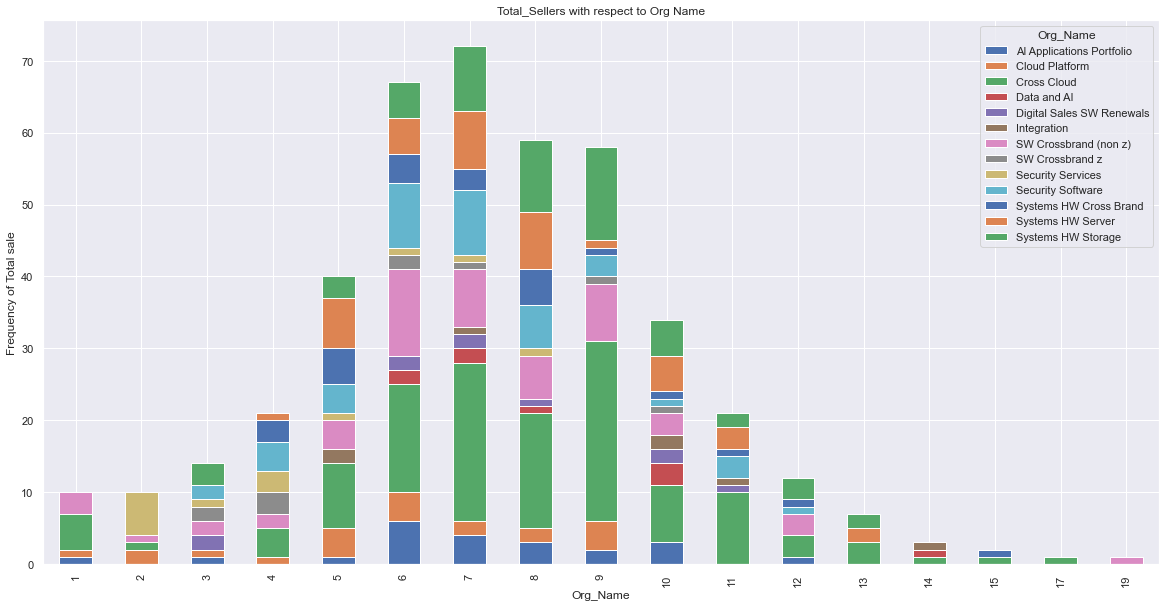

In [163]:
# plt.figure(figsize=(20,5))
plt.rcParams["figure.figsize"] = (20,10)
# plt.figure(figsize = (5,6))
plt.style.context('fivethirtyeight') 
pd.crosstab(flm_data['Total_Sellers'],flm_data ['Org_Name']).plot(kind='bar',stacked=True)
plt.title('Total_Sellers with respect to Org Name')
plt.xlabel('Org_Name')
plt.ylabel('Frequency of Total sale')


### Generating highest sellers by Dedication (Hist $ based)

In [164]:
dedi = flm_data.groupby('Dedication').sum()['Total_Sellers'].reset_index()
dedi = dedi.sort_values('Total_Sellers',ascending=False) 
dedi.head(10)

,Dedication,Total_Sellers
0,0% S1 / 100% S2,1348
3,100% S1 / 0% S2,807
57,71% S1 / 29% S2,47
16,23% S1 / 77% S2,40
7,16% S1 / 84% S2,38
51,64% S1 / 36% S2,38
9,18% S1 / 82% S2,29
59,73% S1 / 27% S2,28
53,66% S1 / 34% S2,28
12,20% S1 / 80% S2,27


<AxesSubplot:xlabel='Dedication', ylabel='Total_Sellers'>

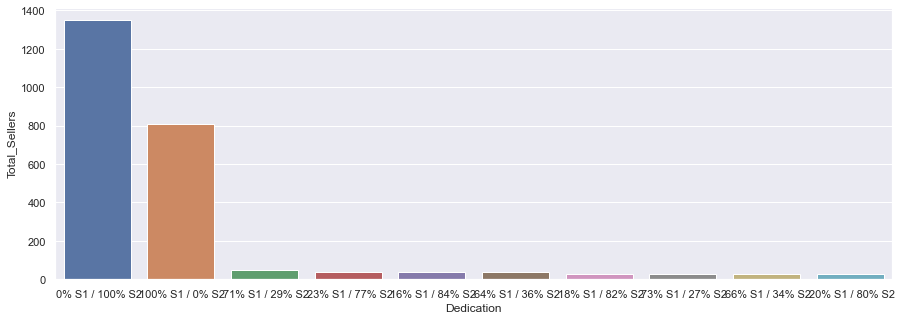

In [165]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(
    data=dedi.iloc[0:10], 
    x='Dedication', 
    y='Total_Sellers')

In [166]:
# Seperating S1 and S2 Dedication % 
flm_data[['Ded_S1','Ded_S2']] = flm_data.Dedication.str.split("/",expand=True)
flm_data[['Ded_S1_Percentage','Ded_S1']] = flm_data.Ded_S1.str.split("%",expand=True)
flm_data[['Ded_S2_Percentage','Ded_S2']] = flm_data.Ded_S2.str.split("%",expand=True)

### Segment percentage impact on total sale 

In [167]:
#Let us chekc segment percentage is having any impact on total sale 

dedi_s1 = flm_data.groupby('Ded_S1_Percentage').sum()['Total_Sellers'].reset_index()
dedi_s1 = dedi_s1.sort_values('Total_Sellers',ascending=False) 

dedi_s2 = flm_data.groupby('Ded_S2_Percentage').sum()['Total_Sellers'].reset_index()
dedi_s2 = dedi_s2.sort_values('Total_Sellers',ascending=False) 
display(dedi_s1,dedi_s2)

,Ded_S1_Percentage,Total_Sellers
0,0,1348
3,100,807
56,71,47
15,23,45
7,16,38
...,...,...
44,54,4
40,5,3
27,37,3
16,24,2


,Ded_S2_Percentage,Total_Sellers
2,100,1348
0,0,814
13,29,47
51,77,40
19,36,38
...,...,...
48,73,5
25,46,4
40,63,3
65,95,3


Text(0.5, 1.0, 'Segment 2 percentage ')

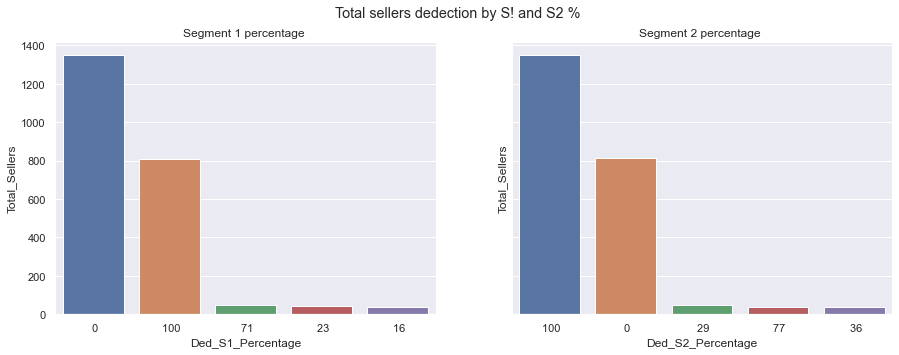

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Total sellers dedection by S! and S2 % ')

# Ded_S1_Percentage
sns.barplot(ax=axes[0],data=dedi_s1.iloc[0:5], x='Ded_S1_Percentage', y='Total_Sellers')
axes[0].set_title('Segment 1 percentage ')
# Ded_S1_Percentage
sns.barplot(ax=axes[1],data=dedi_s2.iloc[0:5], x='Ded_S2_Percentage', y='Total_Sellers')
axes[1].set_title('Segment 2 percentage ')    

    Obsserved S1 and S2 forcasted same and opposite frequncies for each other 

In [169]:
# import matplotlib.pyplot as plt
# ded = dedi_s1['Ded_S1_Percentage'].head()
# tot_sel = dedi_s1['Total_Sellers'].head()
# # plt.style.use('ggplot')
# fig, ax = plt.subplots(figsize =(15, 6)) 
# plt.barh(ded,tot_sel)
# plt.title('Top Total sellers by Dedication segment 1 percentage')
# plt.ylabel('Dedication')
# plt.xlabel('Total_Sellers')
# plt.show()

### Finding total sellers trends by Mgr Role Description

In [170]:
#Let us count the Manager roles Geo and country wise 
mgr_r_count=pd.DataFrame(flm_data, columns= ['Mgr_Role','Total_Sellers','Geo','Country'])
mgr_r_count1= mgr_r_count.pivot_table(index=['Mgr_Role','Country','Geo'], values=['Total_Sellers'], aggfunc='count')
mgr_r_count1 = mgr_r_count1.sort_values('Total_Sellers',ascending=False) 
mgr_r_count1.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_r_count1.csv', index = True, header=True)
mgr_r_count1 .head(10)

,,,Total_Sellers
Mgr_Role,Country,Geo,
C&DP Cloud & Data Platform FLM IQP,UNITED STATES,Americas,24
C&DP Cloud & Data Platform CTP MGR IQP-TQP S2,UNITED STATES,Americas,19
Storage Sales Manager,UNITED STATES,Americas,17
Storage Technical Manager,UNITED STATES,Americas,14
Server Solutions Sales BSS Manager,UNITED STATES,Americas,11
C&DP Cloud & Data Platform S&A 25 FLM IQP S1 and S2,UNITED STATES,Americas,9
AIA AI Applications Portfolio (Blended CTL) FLM IQP (Restricted Use) S1 and S2,UNITED STATES,Americas,8
CB SCTA Crossbrand Software Client Technical Architect MGR IQP S1 and S2,UNITED STATES,Americas,6
CB Crossbrand DM SCL CTA FLM IQP S1 and S2,UNITED STATES,Americas,6


    We have counted here the total number of roles used for country and Geo,the output of the file is saved mgr_r_count1.csv

In [171]:
# mgr_r_count1 = mgr_r_count1.groupby(['Mgr_Role', 'Country','Total_Sellers'], as_index=False).first()
mgrc=mgr_r_count1.groupby('Country',as_index=True).sum()
mgrc= mgrc.sort_values('Total_Sellers',ascending=False) 
mgrc.head(10)

,Total_Sellers
Country,
UNITED STATES,201
Japan,29
CANADA,26
Germany,24
BRAZIL,15
China,14
"Korea, Republic of",12
Italy,12
MEXICO,11


     County wise total number of Manager roles

<AxesSubplot:xlabel='Country'>

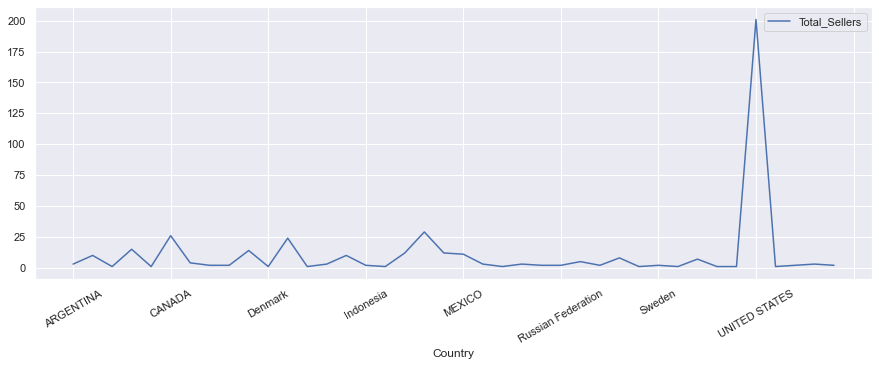

In [172]:
mgr_r_count1plt= mgr_r_count.pivot_table(index=['Country'], values=['Total_Sellers'], aggfunc='count') .plot()
plt.setp(mgr_r_count1plt.get_xticklabels(),rotation=30)
mgr_r_count1plt

    Manager roles which are occured highest number of counts in country level  and it is US in our case

### Manger Roles by Total Sellers

In [173]:
mgr_role = flm_data.groupby('Mgr_Role').sum()['Total_Sellers'].reset_index()
mgr_role= mgr_role.sort_values('Total_Sellers',ascending=False) 

In [174]:
#Top 10 Manaer roles of total sellers 
mgr_role.head(10)

,Mgr_Role,Total_Sellers
17,C&DP Cloud & Data Platform FLM IQP,341
87,Storage Sales Manager,245
88,Storage Technical Manager,175
16,C&DP Cloud & Data Platform CTP MGR IQP-TQP S2,152
83,Server Solutions Sales BSS Manager,131
52,MB Cloud & Data Platform and AI Apps (Blended ...,96
34,CP Cloud Platform F2F Sales FLM IQP,90
19,C&DP Cloud & Data Platform S&A 25 FLM IQP S1 a...,89
90,Systems HW Sales Leader (non exec) - Market or...,87
25,CB SCL Crossbrand Software Client Leader FLM I...,83


    Top 10 Managers roles contributed more to total sellers

In [175]:
#Top 10 Manaer roles of total sellers 
mgr_role.tail(10)

,Mgr_Role,Total_Sellers
73,SEC Security Specialist CTP MGR IQP-TQP S1 and...,4
33,CP Cloud Platform F2F Market Leader incl GTS T...,4
2,AIA AI Applications Portfolio CTP MGR IQP-TQP ...,3
13,Brand Sales Partner Specialist (BSPS) Storage ...,3
48,EXEC - Technology Leader - Country EAC,3
81,Security Services Sales Manager (SLM) IQP S1 a...,3
60,MB Technology Leader - IQP Non Executive,1
20,C&DP Cloud & Data Platform SLM IQP,1
45,EXEC - MB Cloud & Data Platform and AI Apps EA...,1
6,AIA ECOSYS AI Applications Portfolio BSPS-S2 P...,1


    Above Manager Roles are performed at least of sellers for total sellers  

In [176]:
# # Highest 10 individual Manager Roels whihc has hightst  in respect to their County, Market ,Geo and Org Name 
# mgr_county = flm_data.groupby(['Total_Sellers','Mgr_Role', 'Country','Market','Business_Unit'], as_index=False).first()

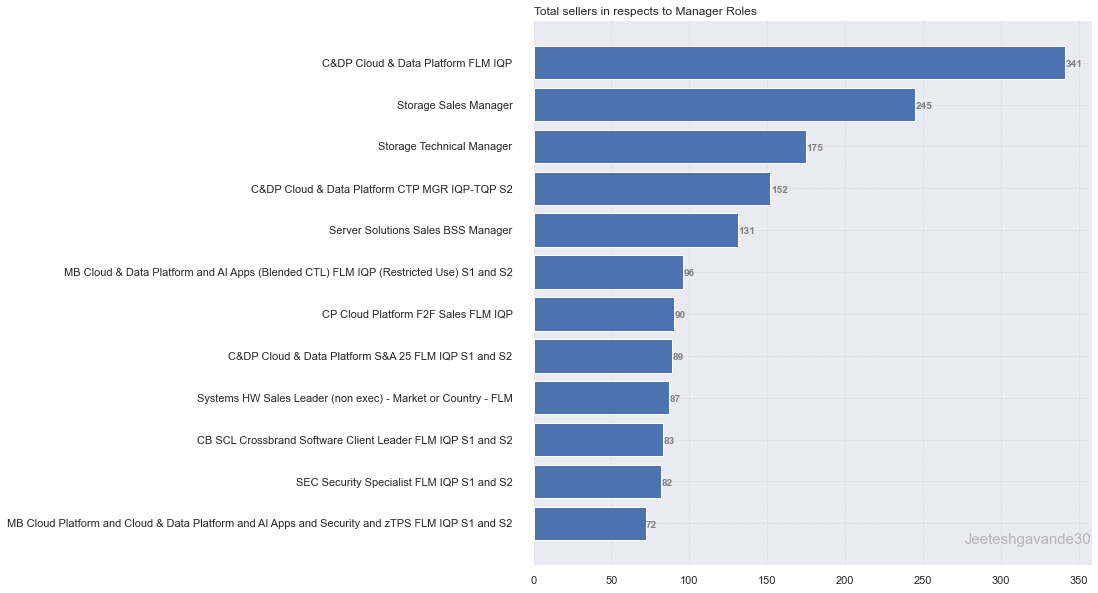

In [177]:
#Plot Manager Role by Total sellers

mgr = mgr_role['Mgr_Role'].head(12)
seller = mgr_role['Total_Sellers'].head(12)
 
# Figure Size
fig, ax = plt.subplots(figsize =(10,10))
 
# Horizontal Bar Plot
ax.barh(mgr, seller)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 15)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Total sellers in respects to Manager Roles',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 15,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.5)
 
# Show Plot
plt.show()

    Above Manager roles are performed well towards total sellers 

In [178]:
flm_data.describe()

,Client_Tot,F2F_Sellers,Ecosystem_Sellers,Digital_Sellers,Technical_Sellers,Total_Sellers
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,6406.298611,4.245370,0.497685,0.175926,2.418981,7.337963
std,10939.200559,3.696738,1.303215,1.164667,3.971816,2.726793
min,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,138.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,2250.000000,5.000000,0.000000,0.000000,0.000000,7.000000
75%,6486.500000,7.000000,0.000000,0.000000,6.000000,9.000000
max,75054.000000,19.000000,12.000000,11.000000,17.000000,19.000000


    Ecosystem_Seller and Digital_Sellers average is less comparing to F2F and Tech sellers 

###  Geo wise total sellers by Manager Roles

In [179]:
mgr_c_sale=pd.DataFrame(flm_data, columns= ['Mgr_Role','Total_Sellers','Geo','Country','Business_Unit','Market','Mgr_Id'])
mgr_g_sellers= mgr_c_sale.pivot_table(index=['Mgr_Role','Geo'], values=['Total_Sellers'], aggfunc='sum')
mgr_g_sellers= mgr_g_sellers.sort_values('Total_Sellers',ascending=False) 
mgr_g_sellers.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_geo_sellers.csv', index = True, header=True)

mgrg=mgr_g_sellers.groupby('Geo',as_index=True).sum()
mgrg= mgrg.sort_values('Total_Sellers',ascending=False)
display(mgr_g_sellers,mgrg)

,,Total_Sellers
Mgr_Role,Geo,
C&DP Cloud & Data Platform FLM IQP,Americas,209
Storage Sales Manager,Americas,158
C&DP Cloud & Data Platform CTP MGR IQP-TQP S2,Americas,152
Storage Technical Manager,Americas,147
Server Solutions Sales BSS Manager,Americas,97
...,...,...
C&DP Cloud & Data Platform SLM IQP,EMEA,1
AIA ECOSYS AI Applications Portfolio BSPS-S2 Partner Focus (Named Partners) REP IQP S2,Americas,1
MB Technology Leader - IQP Non Executive,APAC,1


,Total_Sellers
Geo,
Americas,2045
APAC,543
EMEA,367
Japan,215


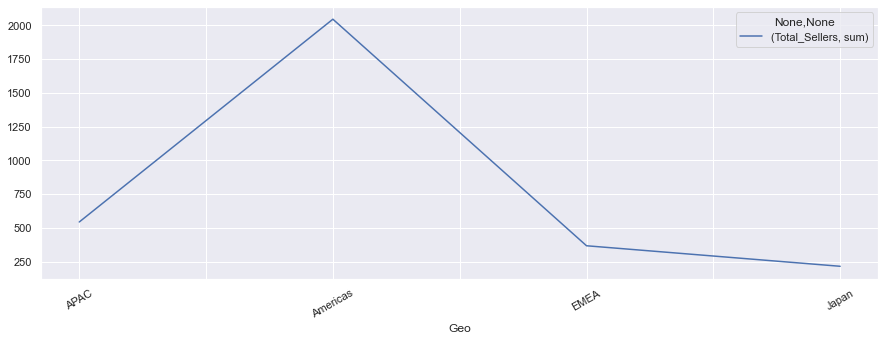

In [180]:
pivot_g_seller = mgr_g_sellers.pivot_table(index=['Geo'], values=['Total_Sellers'], aggfunc={'sum'}).plot()
plt.setp(pivot_g_seller.get_xticklabels(),rotation=30)
plt.show()

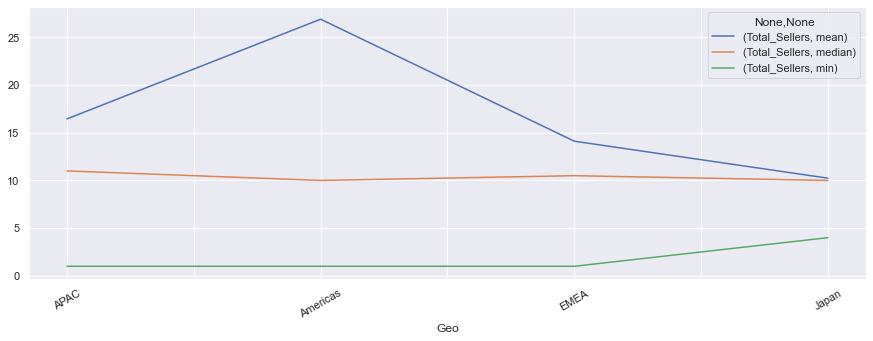

In [181]:
pivot_g_seller = mgr_g_sellers.pivot_table(index=['Geo'], values=['Total_Sellers'], aggfunc={'mean','median','min'}).plot()
plt.setp(pivot_g_seller.get_xticklabels(),rotation=30)
plt.show()

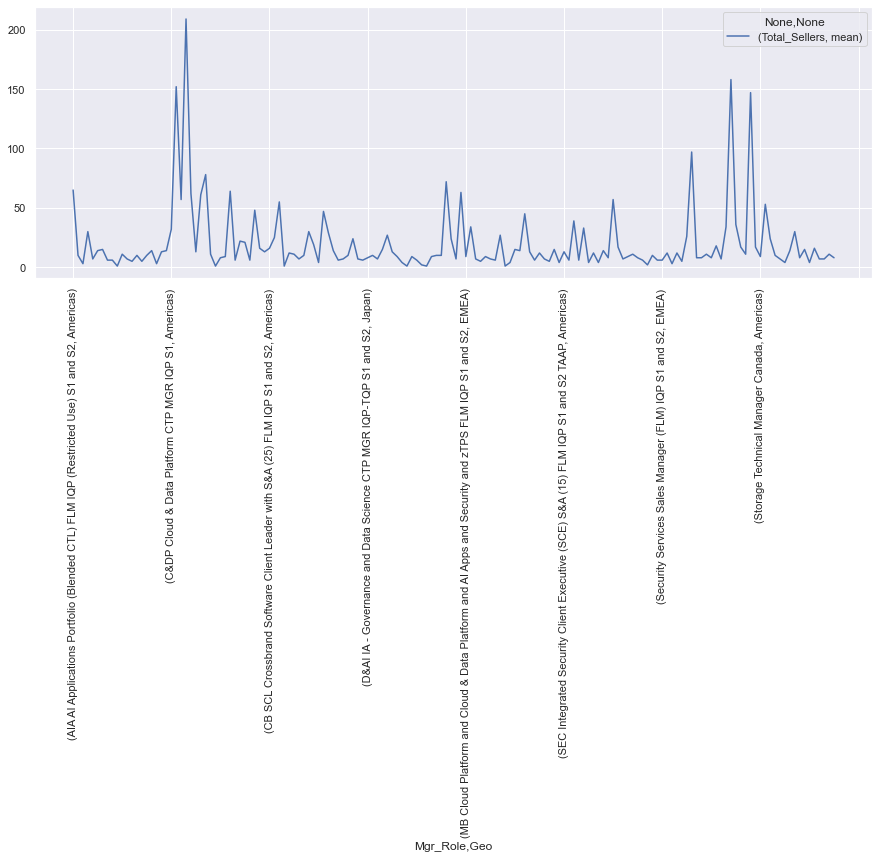

In [182]:
pivot_g_seller = mgr_g_sellers.pivot_table(index=['Mgr_Role','Geo'], values=['Total_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_g_seller.get_xticklabels(),rotation=90)
plt.show()

### Country wise total sellers by Manager Roles

In [183]:
import pandas as pd
mgr_c_sale=pd.DataFrame(flm_data, columns= ['Mgr_Role','Total_Sellers','Geo','Country','Business_Unit','Market'])
mgr_c_sellers= mgr_c_sale.pivot_table(index=['Mgr_Role','Country'], values=['Total_Sellers'], aggfunc='sum')
mgr_c_sellers= mgr_c_sellers.sort_values('Total_Sellers',ascending=False) 
mgr_c_sellers.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_country_sellers.csv', index = True, header=True)

mgrc=mgr_c_sellers.groupby('Country',as_index=True).sum()
mgrc= mgrc.sort_values('Total_Sellers',ascending=False)
display(mgr_c_sellers,mgrc)

,,Total_Sellers
Mgr_Role,Country,
C&DP Cloud & Data Platform FLM IQP,UNITED STATES,181
C&DP Cloud & Data Platform CTP MGR IQP-TQP S2,UNITED STATES,152
Storage Sales Manager,UNITED STATES,141
Storage Technical Manager,UNITED STATES,138
Server Solutions Sales BSS Manager,UNITED STATES,80
...,...,...
AIA ECOSYS AI Applications Portfolio BSPS-S2 Partner Focus (Named Partners) REP IQP S2,UNITED STATES,1
EXEC - MB Cloud & Data Platform and AI Apps EAC (Restricted Use) S1 and S2,COLOMBIA,1
MB Cloud Platform and Cloud & Data Platform and AI Apps and Security and zTPS FLM IQP S1 and S2,United Arab Emirates,1


,Total_Sellers
Country,
UNITED STATES,1561
Japan,215
Germany,181
CANADA,166
BRAZIL,130
China,102
"Korea, Republic of",93
MEXICO,86
Australia,79


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

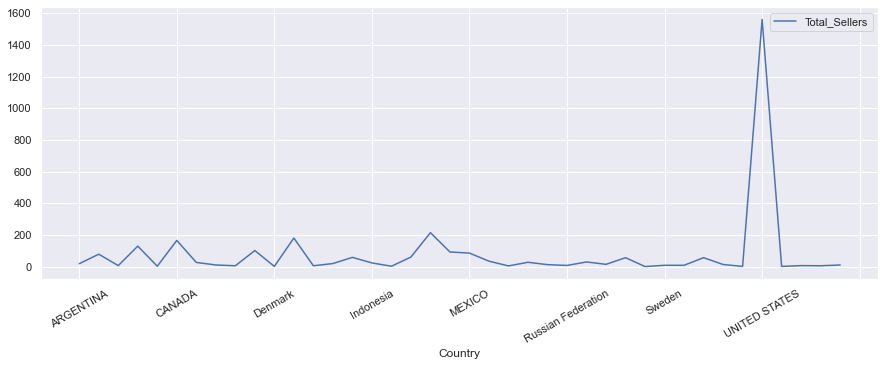

In [184]:
# Plot Manager Role Vs Total sellers in respect to total sellers
mrg_c_pivot = mgr_c_sellers.pivot_table(index=['Country'], values=['Total_Sellers'], aggfunc='sum').plot()
plt.setp(mrg_c_pivot.get_xticklabels(),rotation=30)

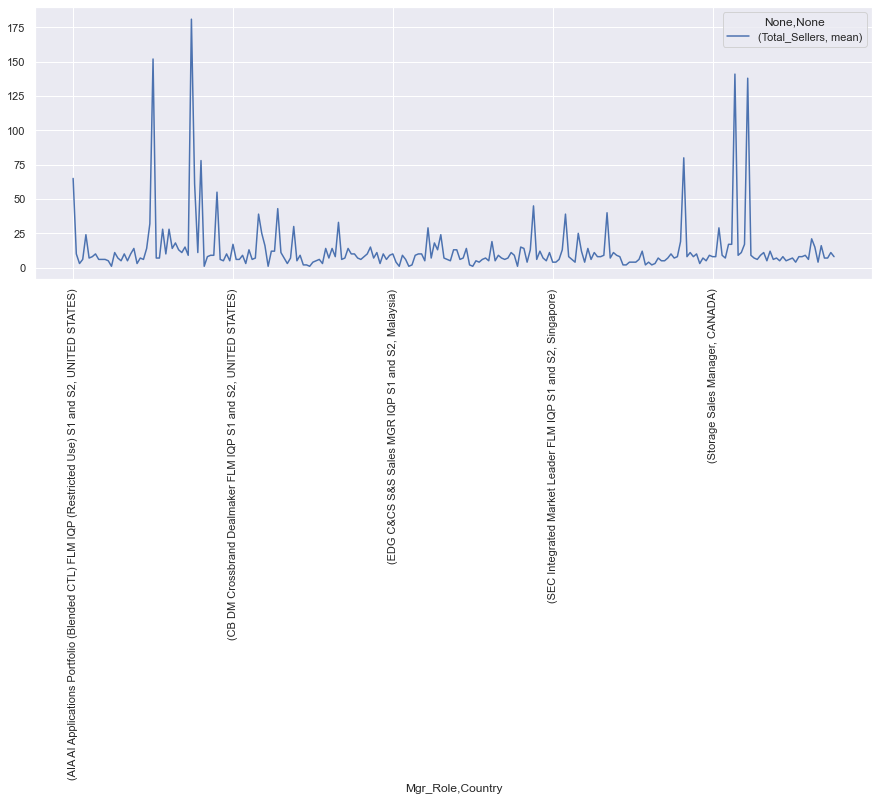

In [185]:
pivot_c_seller = mgr_c_sellers.pivot_table(index=['Mgr_Role','Country'], values=['Total_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_c_seller.get_xticklabels(),rotation=90)
plt.show()

###  Market wise total sellers by Manager Roles

In [186]:
mgr_m_sellers= mgr_c_sale.pivot_table(index=['Mgr_Role','Market'], values=['Total_Sellers'], aggfunc='sum')
# mgr_m_sellers = mgr_c_sale.pivot_table(index=['Mgr_Role','Market'], values=['Total_Sellers'], aggfunc={'sum'})
mgr_m_sellers = mgr_m_sellers.sort_values('Total_Sellers',ascending=False) 
mgr_m_sellers.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_market_sellers.csv', index = True, header=True)

mgr_m_sellers

Total_Sellers
Mgr_Role                                           Market                                     
MB Cloud & Data Platform and AI Apps (Blended C... LA                                       72
Storage Technical Manager                          US Public Market                         52
MB Cloud Platform and Cloud & Data Platform and... ASEAN                                    51
C&DP Cloud & Data Platform FLM IQP                 DACH                                     44
                                                   US Financial Services Market             44
...                                                                                        ...
EXEC - Technology Leader - Country EAC             Central/East Europe                       1
EXEC - MB Cloud & Data Platform and AI Apps EAC... LA                                        1
CB SCTA Crossbrand Software Client Technical Ar... Italy                                     1
AIA ECOSYS AI Applications Portfolio BSPS-S2 Pa... US Above Market                           1
C&DP Cloud & Data Platform SLM IQP                 Italy                                     1

[280 rows x 1 columns]

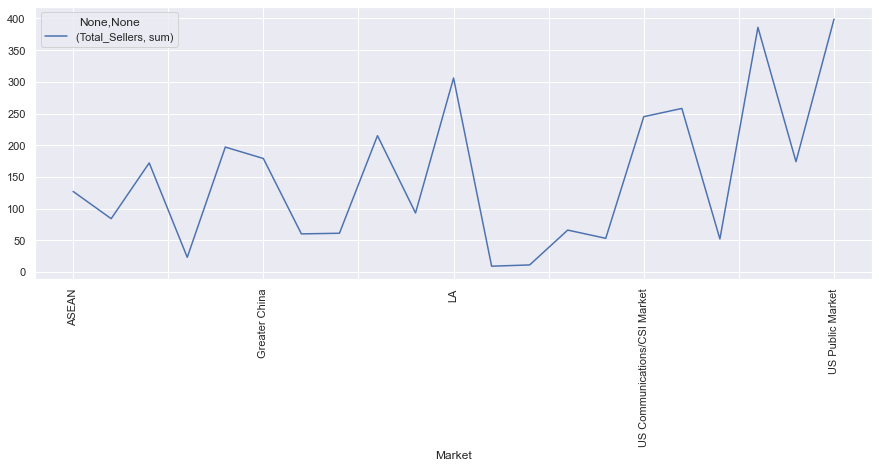

In [187]:
pivot_m_sellers = mgr_m_sellers.pivot_table(index=['Market'], values=['Total_Sellers'], aggfunc={'sum'}).plot()
plt.setp(pivot_m_sellers.get_xticklabels(),rotation=90)
plt.show()

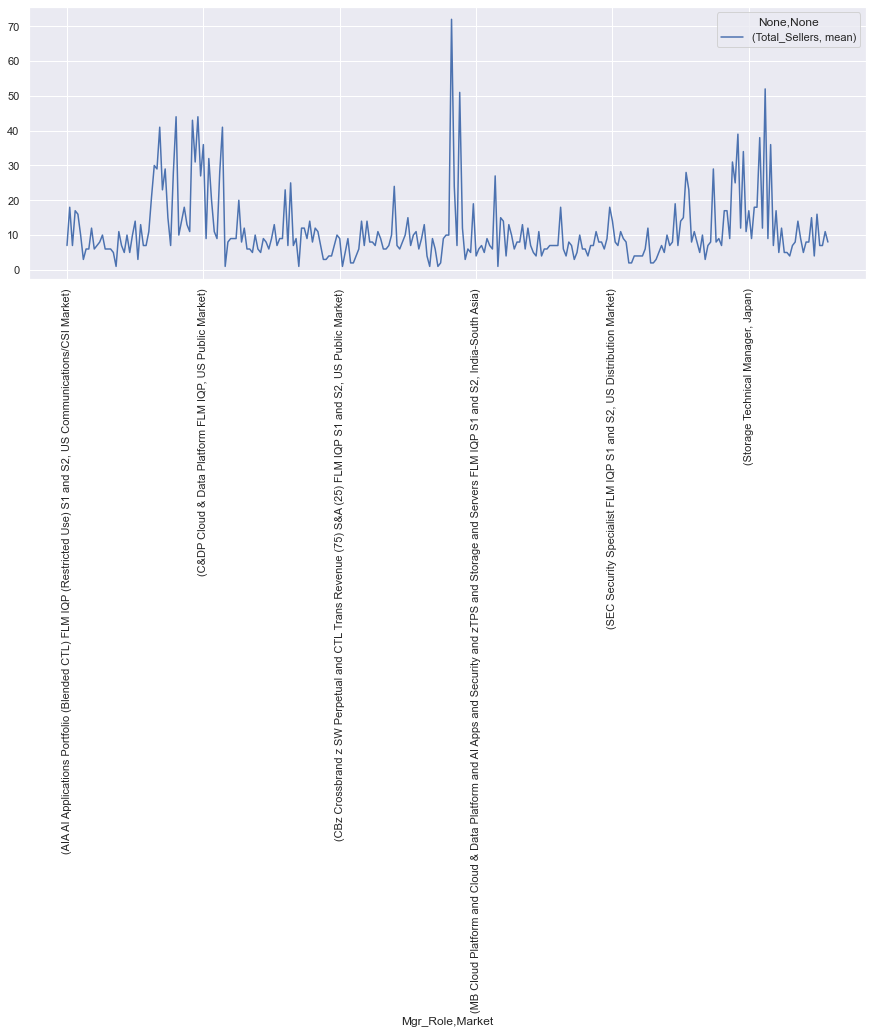

In [188]:
pivot_m_sellers = mgr_m_sellers.pivot_table(index=['Mgr_Role','Market'], values=['Total_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_m_sellers.get_xticklabels(),rotation=90)
plt.show()

### Business Unit wise total sellers by Manager Roles

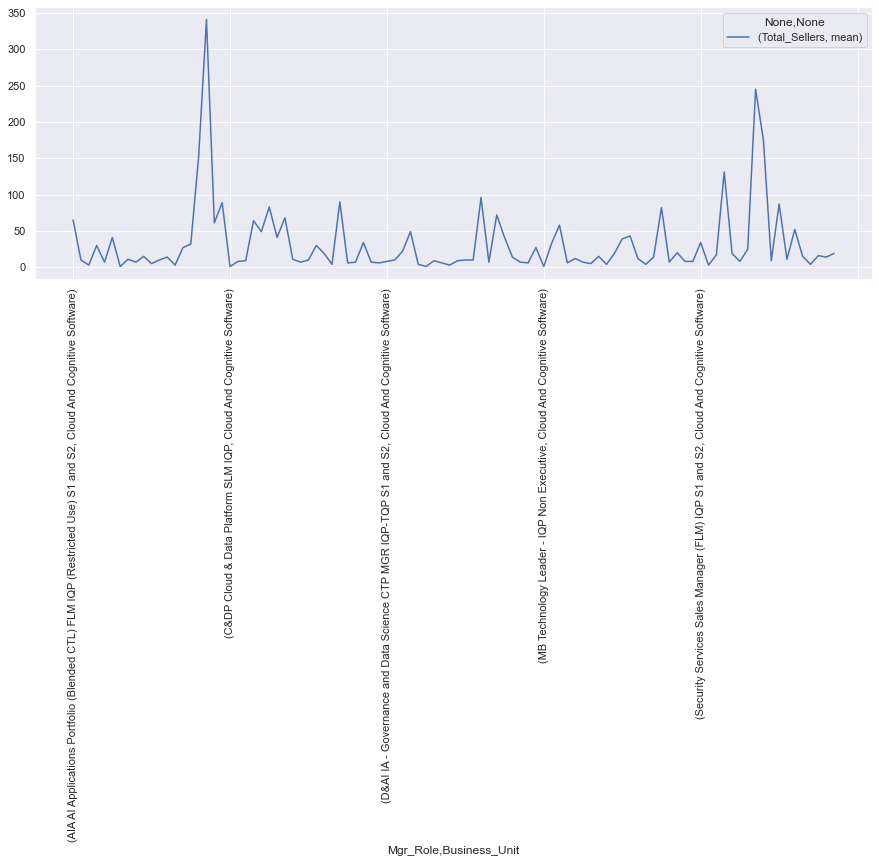

In [189]:
mgr_b_sellers = mgr_c_sale.pivot_table(index=['Mgr_Role','Business_Unit'], values=['Total_Sellers'], aggfunc='sum')
mgr_b_sellers = mgr_b_sellers.sort_values('Total_Sellers',ascending=False) 
mgr_b_sellers.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_business_unit_sellers.csv', index = True, header=True)
pivot_b_sellers = mgr_b_sellers.pivot_table(index=['Mgr_Role','Business_Unit'], values=['Total_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_b_sellers.get_xticklabels(),rotation=90)
plt.show()

###  Manager Id wise total sellers by Manager Roles

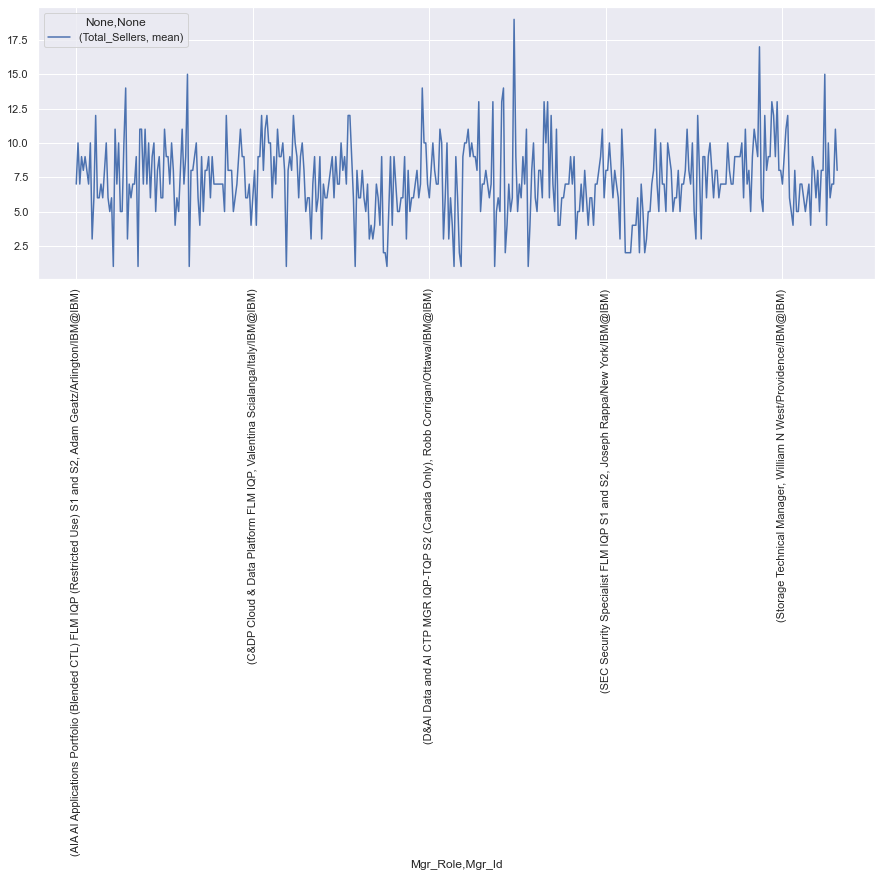

In [190]:
mgr_id_sellers = flm_data.pivot_table(index=['Mgr_Role','Mgr_Id'], values=['Total_Sellers'], aggfunc='sum')
mgr_id_sellers = mgr_id_sellers.sort_values('Total_Sellers',ascending=False) 
mgr_id_sellers.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_id_sellers.csv', index = True, header=True)
pivot_id_sellers = mgr_id_sellers.pivot_table(index=['Mgr_Role','Mgr_Id'], values=['Total_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_id_sellers.get_xticklabels(),rotation=90)
plt.show()

### Comparision of F2F_Sellers,Ecosystem_Sellers,Digital_Sellers,Technical_Sellers by Mgr_Role

In [191]:
#Checking at glacne value of F2F_Sellers,Ecosystem_Sellers,Digital_Sellers,Technical_Sellers
mgr_f2f = flm_data.groupby('Mgr_Role').sum()['F2F_Sellers'].reset_index()
mgr_eco = flm_data.groupby('Mgr_Role').sum()['Ecosystem_Sellers'].reset_index()
mgr_dig = flm_data.groupby('Mgr_Role').sum()['Digital_Sellers'].reset_index()
mgr_tech = flm_data.groupby('Mgr_Role').sum()['Technical_Sellers'].reset_index()

mgr_f2f= mgr_f2f.sort_values('F2F_Sellers',ascending=False) 
mgr_eco = mgr_eco .sort_values('Ecosystem_Sellers',ascending=False) 
mgr_dig= mgr_dig.sort_values('Digital_Sellers',ascending=False) 
mgr_tech= mgr_tech.sort_values('Technical_Sellers',ascending=False) 

display_side_by_side(mgr_f2f,mgr_eco,mgr_dig,mgr_tech, titles=[' F2F_Sellers by Mgr_Role','Ecosystem_Sellers by Mgr_Role ','Digital_Sellers by Mgr_Role','Technical_Sellers by Mgr_Role'])

,Mgr_Role,F2F_Sellers
17,C&DP Cloud & Data Platform FLM IQP,285
87,Storage Sales Manager,245
83,Server Solutions Sales BSS Manager,131
19,C&DP Cloud & Data Platform S&A 25 FLM IQP S1 and S2,89
90,Systems HW Sales Leader (non exec) - Market or Country - FLM,87
25,CB SCL Crossbrand Software Client Leader FLM IQP S1 and S2,83
34,CP Cloud Platform F2F Sales FLM IQP,79
52,MB Cloud & Data Platform and AI Apps (Blended CTL) FLM IQP (Restricted Use) S1 and S2,79
75,SEC Security Specialist FLM IQP S1 and S2,64
23,CB Crossbrand DM SCL CTA FLM IQP S1 and S2,64


Text(0.5, 1.0, 'Technical_Sellers by Mgr_Role ')

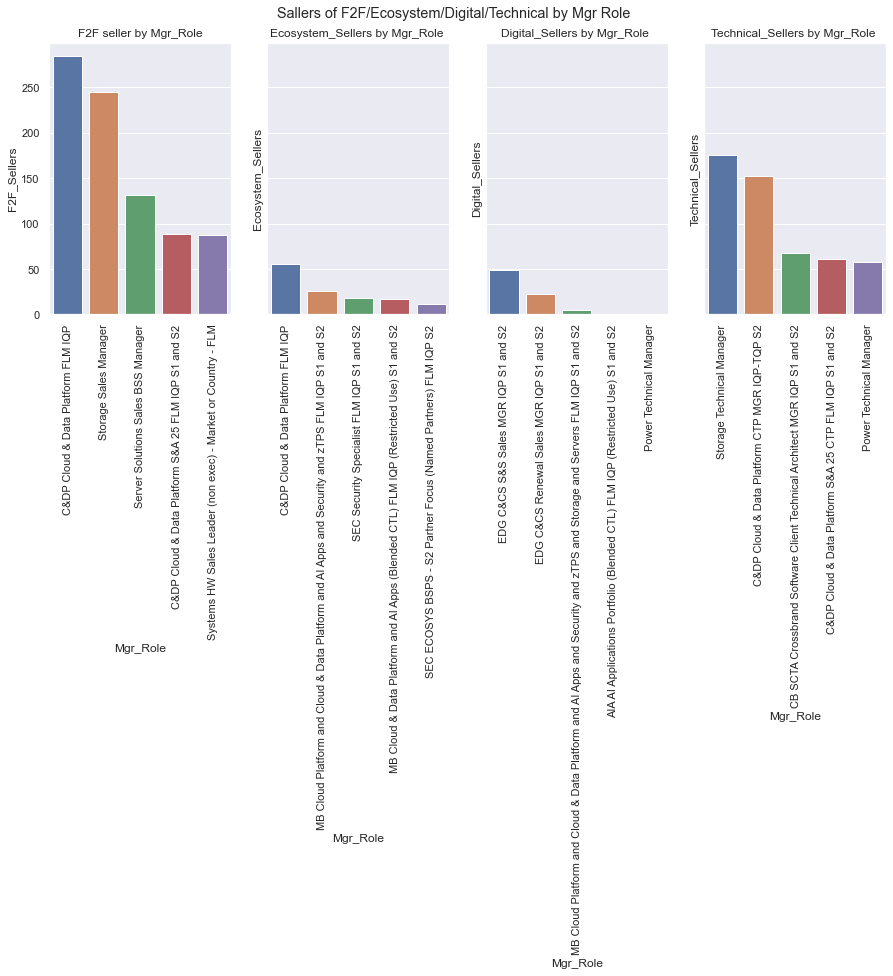

In [192]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Sallers of F2F/Ecosystem/Digital/Technical by Mgr Role')

# F2F_Sellers
g=sns.barplot(ax=axes[0],data=mgr_f2f.iloc[0:5], x='Mgr_Role', y='F2F_Sellers')
plt.setp(g.get_xticklabels(), rotation=90)
axes[0].set_title('F2F seller by Mgr_Role')
# Ecosystem_Sellers
h=sns.barplot(ax=axes[1],data=mgr_eco.iloc[0:5], x='Mgr_Role', y='Ecosystem_Sellers')
plt.setp(h.get_xticklabels(), rotation=90)
axes[1].set_title('Ecosystem_Sellers by Mgr_Role ')    
# Ecosystem_Sellers
f=sns.barplot(ax=axes[2],data=mgr_dig.iloc[0:5], x='Mgr_Role', y='Digital_Sellers')
plt.setp(f.get_xticklabels(), rotation=90)
axes[2].set_title('Digital_Sellers by Mgr_Role ')    
# Ecosystem_Sellers
k=sns.barplot(ax=axes[3],data=mgr_tech.iloc[0:5], x='Mgr_Role', y='Technical_Sellers')
plt.setp(k.get_xticklabels(), rotation=90)
axes[3].set_title('Technical_Sellers by Mgr_Role ')    

In [193]:
# # Checking how many "0" value we got for all thes four sellers 
# mgr_role_zero_sale=flm_data[['Mgr_Role','Country','F2F_Sellers',
#        'Ecosystem_Sellers', 'Digital_Sellers', 'Technical_Sellers',
#        'Total_Sellers']]
# zero_f2f = mgr_role_zero_sale[(mgr_role_zero_sale.F2F_Sellers == 0)].F2F_Sellers.count()
# zero_eco = mgr_role_zero_sale[(mgr_role_zero_sale.Ecosystem_Sellers == 0)].Ecosystem_Sellers.count()
# zero_dig = mgr_role_zero_sale[(mgr_role_zero_sale.Digital_Sellers == 0)].Digital_Sellers.count()
# zero_tech = mgr_role_zero_sale[(mgr_role_zero_sale.Technical_Sellers == 0)].Technical_Sellers.count()
# # display(zero_f2f,zero_eco,zero_dig,zero_tech)
# zero_f2f

### Manger role by Country/Geo along with F2F_Sellers,Ecosystem_Sellers,Digital_Sellers,Technical_Sellers

In [194]:
mgr_c_sale1=pd.DataFrame(flm_data, columns= ['Mgr_Role','F2F_Sellers','Ecosystem_Sellers','Digital_Sellers','Technical_Sellers','Geo','Country','Business_Unit','Total_Sellers'])
mgr_sale_break= mgr_c_sale1.pivot_table(index=['Mgr_Role','Country','Geo'], values=['F2F_Sellers','Ecosystem_Sellers','Digital_Sellers','Technical_Sellers'], aggfunc='sum')
mgr_f2f_sale= mgr_sale_break.sort_values('F2F_Sellers',ascending=False)
mgr_f2f_sale.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_f2f_sellers.csv', index = True, header=True)


In [246]:
mgr_sale_break.describe()

,Digital_Sellers,Ecosystem_Sellers,F2F_Sellers,Technical_Sellers
count,239.000000,239.000000,239.000000,239.000000
mean,0.317992,0.899582,7.673640,4.372385
std,1.741525,2.296865,16.894202,14.875373
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,1.000000,8.000000,5.000000
max,15.000000,22.000000,159.000000,152.000000


#### Top 10 Roles are with highest  f2f Sellers

In [242]:
mgr_f2f_sale.head(10)

,,,Digital_Sellers,Ecosystem_Sellers,F2F_Sellers,Technical_Sellers
Mgr_Role,Country,Geo,,,,
C&DP Cloud & Data Platform FLM IQP,UNITED STATES,Americas,0,22,159,0
Storage Sales Manager,UNITED STATES,Americas,0,0,141,0
Server Solutions Sales BSS Manager,UNITED STATES,Americas,0,0,80,0
C&DP Cloud & Data Platform S&A 25 FLM IQP S1 and S2,UNITED STATES,Americas,0,0,78,0
AIA AI Applications Portfolio (Blended CTL) FLM IQP (Restricted Use) S1 and S2,UNITED STATES,Americas,0,7,58,0
CB Crossbrand DM SCL CTA FLM IQP S1 and S2,UNITED STATES,Americas,0,0,55,0
CB SCL Crossbrand Software Client Leader FLM IQP S1 and S2,UNITED STATES,Americas,0,0,39,0
SEC Security Specialist (Blended CTL) FLM IQP (Restricted Use) S1 and S2,UNITED STATES,Americas,0,6,33,0
SEC Security Specialist FLM IQP S1 and S2,UNITED STATES,Americas,0,7,33,0


#### Mgr Roles with zero value for F2f sellers

In [228]:
# Mgr Roles with zero value for F2f sellers
mgr_f2f_0 = mgr_f2f_sale[(mgr_f2f_sale.F2F_Sellers == 0)]
mgr_f2f_0.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_f2f_zero.csv', index = True, header=True)
mgr_f2f_0.count()

Digital_Sellers      80
Ecosystem_Sellers    80
F2F_Sellers          80
Technical_Sellers    80
dtype: int64

    F2f is having 80 records with zero sellers

####  Average of county sallers of F2F_Sellers by Mgr_Role

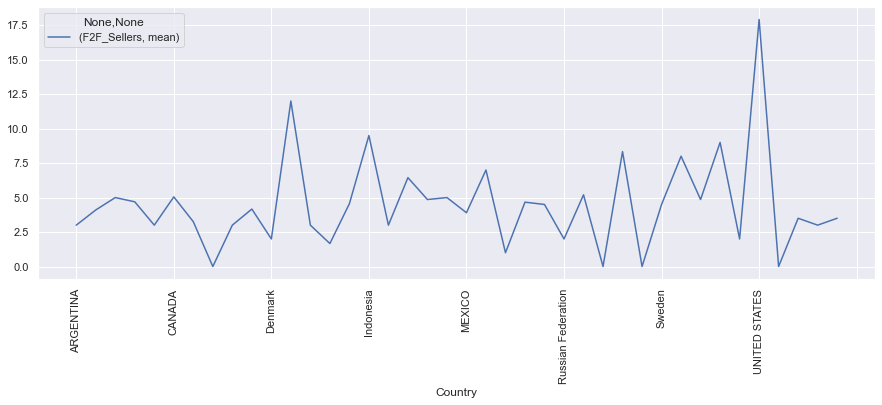

In [232]:
mgr_f2f_sale1= mgr_f2f_sale.pivot_table(index=['Mgr_Role','Country'], values=['F2F_Sellers'], aggfunc='sum')
pivot_f2f = mgr_f2f_sale1.pivot_table(index=['Country'], values=['F2F_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_f2f.get_xticklabels(),rotation=90)
plt.show()

In [198]:
mgr_eco_sale= mgr_sale_break.sort_values('Ecosystem_Sellers',ascending=False)
mgr_eco_sale.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_eco_sellers.csv', index = True, header=True)

#### Top 10 Roles are with highest Ecosystem_Sellers

In [199]:
mgr_eco_sale.head(10)

,,,Digital_Sellers,Ecosystem_Sellers,F2F_Sellers,Technical_Sellers
Mgr_Role,Country,Geo,,,,
C&DP Cloud & Data Platform FLM IQP,UNITED STATES,Americas,0,22,159,0
SEC ECOSYS BSPS - S2 Partner Focus (Named Partners) FLM IQP S2,UNITED STATES,Americas,0,12,0,0
C&DP ECOSYS BSPS-S2 Partner Focus (Named Partners) FLM IQP S2,UNITED STATES,Americas,0,9,0,0
C&DP ECOSYS BSPS - SI Focus FLM IQP S1 and S2,UNITED STATES,Americas,0,8,0,0
AIA AI Applications Portfolio (Blended CTL) FLM IQP (Restricted Use) S1 and S2,UNITED STATES,Americas,0,7,58,0
C&DP Cloud & Data Platform FLM IQP,Australia,APAC,0,7,0,0
SEC Security Specialist FLM IQP S1 and S2,UNITED STATES,Americas,0,7,33,0
SEC ECOSYS BSPS - SI Focus FLM IQP S1 and S2,UNITED STATES,Americas,0,7,0,0
SEC Security Specialist (Blended CTL) FLM IQP (Restricted Use) S1 and S2,UNITED STATES,Americas,0,6,33,0


In [229]:
# Mgr Roles with zero value for Ecosystem_Sellers
mgr_eco_0 = mgr_eco_sale[(mgr_eco_sale.Ecosystem_Sellers == 0)]
mgr_eco_0.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_eco_zero.csv', index = True, header=True)
mgr_eco_0.count()

Digital_Sellers      178
Ecosystem_Sellers    178
F2F_Sellers          178
Technical_Sellers    178
dtype: int64

    Ecosystem_Sellers  is having 178 zero records

#### Average of county sallers of Ecosystem_Sellers by Mgr_Role¶

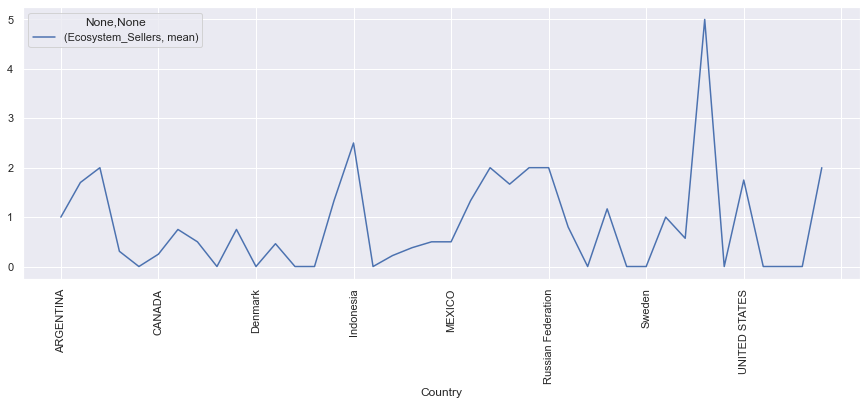

In [233]:
mgr_eco_1= mgr_eco_sale.pivot_table(index=['Mgr_Role','Country'], values=['Ecosystem_Sellers'], aggfunc='sum')
mgr_eco= mgr_eco.sort_values('Ecosystem_Sellers',ascending=False) 
pivot_eco = mgr_eco_1.pivot_table(index=['Country'], values=['Ecosystem_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_eco .get_xticklabels(),rotation=90)
plt.show()


#### Top 10 Roles are with highest Digital_Sellers

In [202]:
mgr_dig_sale= mgr_sale_break.sort_values('Digital_Sellers',ascending=False)
mgr_dig_sale.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_dig_sellers.csv', index = True, header=True)
mgr_dig_sale.head(10)

Digital_Sellers  \
Mgr_Role                                           Country            Geo                         
EDG C&CS Renewal Sales MGR IQP S1 and S2           Slovakia           EMEA                   15   
EDG C&CS S&S Sales MGR IQP S1 and S2               Australia          APAC                   11   
                                                   COLOMBIA           Americas               10   
                                                   Malaysia           APAC                   10   
                                                   Japan              Japan                   9   
EDG C&CS Renewal Sales MGR IQP S1 and S2           Taiwan             APAC                    7   
EDG C&CS S&S Sales MGR IQP S1 and S2               India              APAC                    6   
MB Cloud Platform and Cloud & Data Platform and... Korea, Republic of APAC                    5   
EDG C&CS S&S Sales MGR IQP S1 and S2               BRAZIL             Americas                3   
SEC Security Specialist CTP MGR IQP-TQP S1 and ... CANADA             Americas                0   

                                                                                Ecosystem_Sellers  \
Mgr_Role                                           Country            Geo                           
EDG C&CS Renewal Sales MGR IQP S1 and S2           Slovakia           EMEA                      0   
EDG C&CS S&S Sales MGR IQP S1 and S2               Australia          APAC                      0   
                                                   COLOMBIA           Americas                  0   
                                                   Malaysia           APAC                      0   
                                                   Japan              Japan                     0   
EDG C&CS Renewal Sales MGR IQP S1 and S2           Taiwan             APAC                      0   
EDG C&CS S&S Sales MGR IQP S1 and S2               India              APAC                      0   
MB Cloud Platform and Cloud & Data Platform and... Korea, Republic of APAC                      0   
EDG C&CS S&S Sales MGR IQP S1 and S2               BRAZIL             Americas                  0   
SEC Security Specialist CTP MGR IQP-TQP S1 and ... CANADA             Americas                  0   

                                                                                F2F_Sellers  \
Mgr_Role                                           Country            Geo                     
EDG C&CS Renewal Sales MGR IQP S1 and S2           Slovakia           EMEA                0   
EDG C&CS S&S Sales MGR IQP S1 and S2               Australia          APAC                0   
                                                   COLOMBIA           Americas            0   
                                                   Malaysia           APAC                0   
                                                   Japan              Japan               0   
EDG C&CS Renewal Sales MGR IQP S1 and S2           Taiwan             APAC                0   
EDG C&CS S&S Sales MGR IQP S1 and S2               India              APAC                0   
MB Cloud Platform and Cloud & Data Platform and... Korea, Republic of APAC                1   
EDG C&CS S&S Sales MGR IQP S1 and S2               BRAZIL             Americas            0   
SEC Security Specialist CTP MGR IQP-TQP S1 and ... CANADA             Americas            0   

                                                                                Technical_Sellers  
Mgr_Role                                           Country            Geo                          
EDG C&CS Renewal Sales MGR IQP S1 and S2           Slovakia           EMEA                      0  
EDG C&CS S&S Sales MGR IQP S1 and S2               Australia          APAC                      0  
                                                   COLOMBIA           Americas                  0  
                                     

In [230]:
# Mgr Roles with zero value for Ecosystem_Sellers
mgr_dig_0 = mgr_dig_sale[(mgr_eco_sale.Digital_Sellers == 0)]
mgr_dig_0.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_dig_zero.csv', index = True, header=True)
mgr_dig_0.count()

Digital_Sellers      230
Ecosystem_Sellers    230
F2F_Sellers          230
Technical_Sellers    230
dtype: int64

    Digital_Sellers is haivng 230 recors with zero vlaues

#### Average of county sallers of Digital_Sellers by Mgr_Role

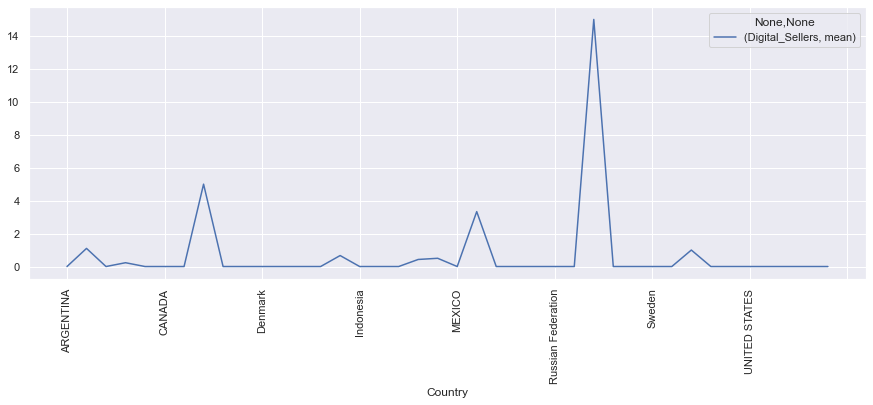

In [234]:
mgr_dig_1= mgr_dig_sale.pivot_table(index=['Mgr_Role','Country'], values=['Digital_Sellers'], aggfunc='sum')
mgr_dig= mgr_dig.sort_values('Digital_Sellers',ascending=False) 
pivot_dig = mgr_dig_1.pivot_table(index=['Country'], values=['Digital_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_dig .get_xticklabels(),rotation=90)
plt.show()

#### Top 10 Roles are with highest Digital_Sellers¶

In [205]:
mgr_tech_sale= mgr_sale_break.sort_values('Technical_Sellers',ascending=False)
mgr_tech_sale.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_tech_sellers.csv', index = True, header=True)
mgr_tech_sale.head(10)

,,,Digital_Sellers,Ecosystem_Sellers,F2F_Sellers,Technical_Sellers
Mgr_Role,Country,Geo,,,,
C&DP Cloud & Data Platform CTP MGR IQP-TQP S2,UNITED STATES,Americas,0,0,0,152
Storage Technical Manager,UNITED STATES,Americas,0,0,0,138
C&DP Cloud & Data Platform S&A 25 CTP FLM IQP S1 and S2,UNITED STATES,Americas,0,0,0,61
Power Technical Manager,UNITED STATES,Americas,0,0,0,45
CB SCTA Crossbrand Software Client Technical Architect MGR IQP S1 and S2,UNITED STATES,Americas,0,0,0,43
C&DP Cloud & Data Platform CTP MGR IQP S1,UNITED STATES,Americas,0,0,1,31
SEC Security Specialist CTP FLM IQP-TQP S1 and S2,UNITED STATES,Americas,0,0,0,25
AIA AI Applications Portfolio CTP MGR IQP-TQP S1 and S2,UNITED STATES,Americas,0,0,0,24
Systems HW Technical Sales Leader (non exec) - Market or Country - FLM,UNITED STATES,Americas,0,0,0,21


In [231]:
# Mgr Roles with zero value for Ecosystem_Sellers
mgr_tech_0 = mgr_tech_sale[(mgr_tech_sale.Technical_Sellers== 0)]
mgr_tech_0.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_tech_zero.csv', index = True, header=True)
mgr_tech_0.count()

Digital_Sellers      167
Ecosystem_Sellers    167
F2F_Sellers          167
Technical_Sellers    167
dtype: int64

    Technical_Sellers is having 167 with zero

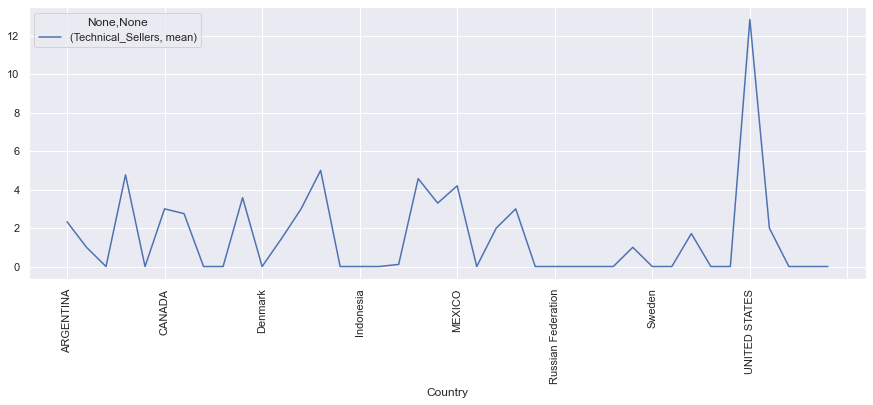

In [239]:
mgr_tech_1= mgr_tech_sale.pivot_table(index=['Mgr_Role','Country'], values=['Technical_Sellers'], aggfunc='sum')
pivot_tech = mgr_tech_1.pivot_table(index=['Country'], values=['Technical_Sellers'], aggfunc={'mean'}).plot()
plt.setp(pivot_tech .get_xticklabels(),rotation=90)
plt.show()

In [208]:
# mgr_id = flm_data.groupby('Mgr_Id').sum()['Total_Sellers'].reset_index()
# mgr_id= mgr_id.sort_values('Total_Sellers',ascending=False) 
# mgr_id.head(10)

#### Total sellers Vs F2F_Sellers,Ecosystem_Sellers, Digital Sellers ,Technical_Sellers 

[Text(0.5, 1.0, 'Technical_Sellers against Total Seller ')]

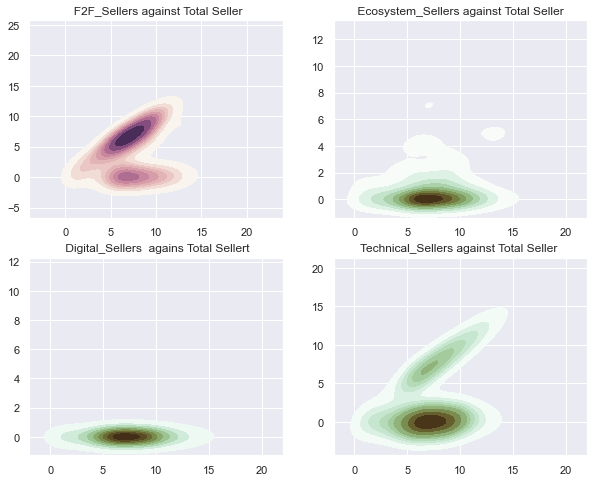

In [209]:

# Plotting the KDEplots
f, axes = plt.subplots(2, 2, figsize=(10, 8),
sharex=False, sharey=False)
# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = flm_data['Total_Sellers'].values
y = flm_data['F2F_Sellers'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = '  F2F_Sellers against Total Seller ')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = flm_data['Total_Sellers'].values
y = flm_data['Ecosystem_Sellers'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = ' Ecosystem_Sellers against Total Seller ')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = flm_data['Total_Sellers'].values
y = flm_data['Digital_Sellers'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set( title = ' Digital_Sellers  agains Total Sellert')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = flm_data['Total_Sellers'].values
y = flm_data['Technical_Sellers'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set( title = 'Technical_Sellers against Total Seller ')


    Ecosystem_Sellers, Digital Sellers are having less significient contribution towards total sellers 

### Total Client vs  Total Sallers

<Figure size 1152x360 with 0 Axes>

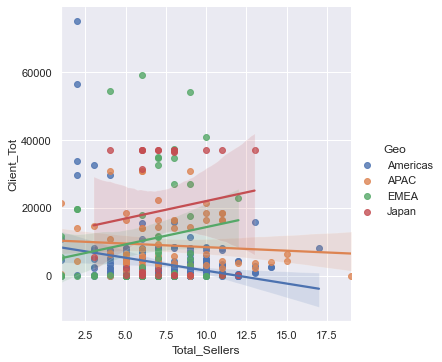

In [219]:
plt.figure(figsize=(16,5))
#plt.style.use('classic')
rating_vs_sales = sns.lmplot(x="Total_Sellers", y= "Client_Tot", data=flm_data ,hue = 'Geo')

#### Check Manager Role wise Total clients Vs Total Sellers

In [211]:
mgr_vs_clsale= flm_data.pivot_table(index=['Mgr_Role','Geo','Client_Tot'], values=['Total_Sellers'], aggfunc='sum')
mgr_vs_clsale= mgr_vs_clsale.sort_values('Total_Sellers',ascending=False) 
mgr_vs_clsale.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/mgr_totalclinet_sellers.csv', index = True, header=True)

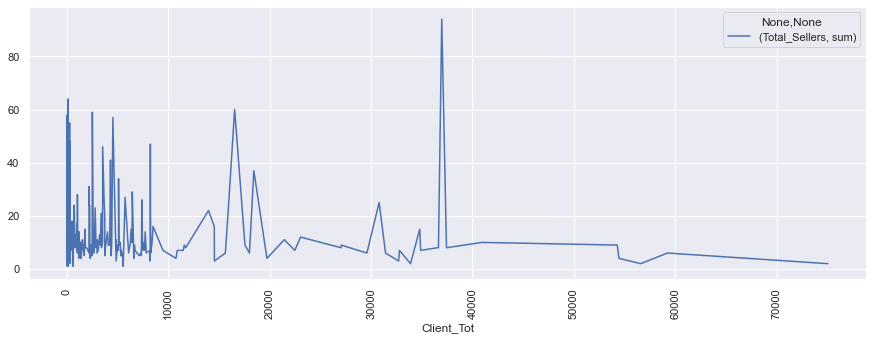

In [250]:
pivot_vs = mgr_vs_clsale.pivot_table(index=['Client_Tot'], values=['Total_Sellers',], aggfunc={'sum'}).plot()
plt.setp(pivot_vs .get_xticklabels(),rotation=90)
plt.show()